In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Rajeev
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from sklearn import metrics
nltk.download('punkt')
nltk.download('Wordnet')
from nltk.tokenize import word_tokenize,sent_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from nltk.stem import  PorterStemmer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import Word


[nltk_data] Downloading package punkt to C:\Users\Rajeev
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading Wordnet: Package 'Wordnet' not found in
[nltk_data]     index


In [5]:
toxic_data=pd.read_csv("D:/subjects/predictive analytics/jigsaw-toxic-comment-classification-challenge/train.csv")
#test=pd.read_csv("D:/subjects/predictive analytics/jigsaw-toxic-comment-classification-challenge/test.csv")

In [6]:
toxic_data['Clean'] =0 # creating the column
toxic_data.loc[(toxic_data['severe_toxic'] ==0 ) &(toxic_data['threat']==0) & (toxic_data['identity_hate']==0)
       & (toxic_data['insult']==0)& (toxic_data['obscene']==0) & (toxic_data['toxic']==0) ,
       'Clean'] = 1

In [7]:
toxic_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


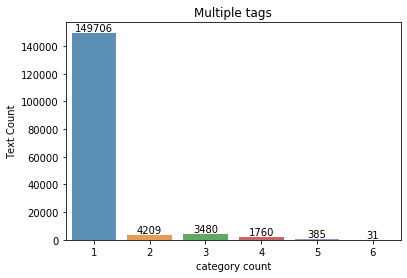

In [13]:
#multilabels
rowsums=toxic_data.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()
x
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Multiple tags")
plt.ylabel('Text Count', fontsize=10)
plt.xlabel('category count', fontsize=10)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()


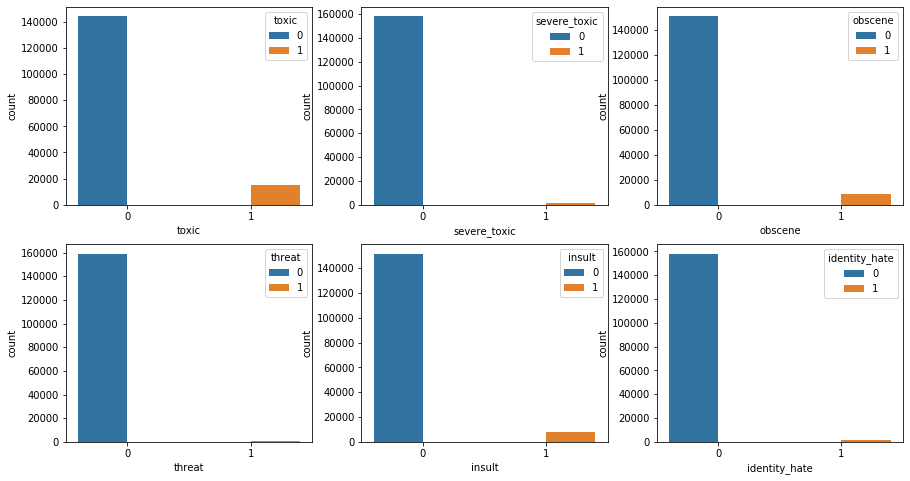

In [15]:
fig,axarr = plt.subplots(2, 3, figsize=(15, 8))
sns.countplot(toxic_data.toxic, hue=toxic_data.toxic,ax= axarr[0,0])
sns.countplot(toxic_data.severe_toxic, hue=toxic_data.severe_toxic,ax= axarr[0,1])
sns.countplot(toxic_data.obscene, hue=toxic_data.obscene,ax= axarr[0,2])
sns.countplot(toxic_data.threat, hue=toxic_data.threat,ax= axarr[1,0])
sns.countplot(toxic_data.insult, hue=toxic_data.insult,ax= axarr[1,1])
sns.countplot(toxic_data.identity_hate, hue=toxic_data.identity_hate,ax= axarr[1,2])

In [16]:
# filtering the comment based on toxicity levels
clean_comment = " ".join(review for review in toxic_data[toxic_data['Clean']==1]['comment_text'])

negative_comment = " ".join(review for review in toxic_data[(toxic_data['severe_toxic'] ==1 ) | (toxic_data['threat']==1) |(toxic_data['identity_hate']==1)
       | (toxic_data['insult']==1)|(toxic_data['obscene']==1) | (toxic_data['toxic']==1)]['comment_text'])

severe_toxic_comment = " ".join(review for review in toxic_data[(toxic_data['severe_toxic'] ==1 )]['comment_text'])

threat_comment = " ".join(review for review in toxic_data[(toxic_data['threat']==1)]['comment_text'])

identity_hate_comment = " ".join(review for review in toxic_data[(toxic_data['identity_hate']==1)]['comment_text'])

insult_comment = " ".join(review for review in toxic_data[(toxic_data['insult']==1)]['comment_text'])

obscene_comment = " ".join(review for review in toxic_data[(toxic_data['obscene']==1)]['comment_text'])     

toxic_comment = " ".join(review for review in toxic_data[(toxic_data['toxic']==1)]['comment_text'])

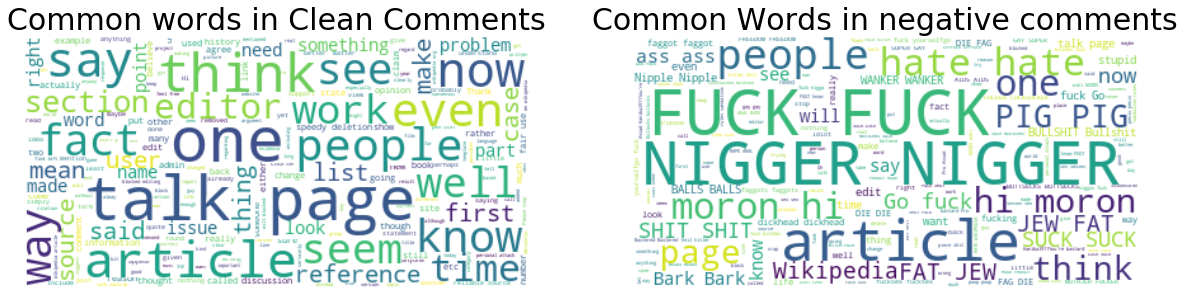

In [17]:
# word cloud for clean and not clean comments
stopword=set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(clean_comment)

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.title("Common words in Clean Comments", fontsize=30)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(negative_comment)
plt.subplot(2,2,2)
plt.title("Common Words in negative comments", fontsize=30)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()


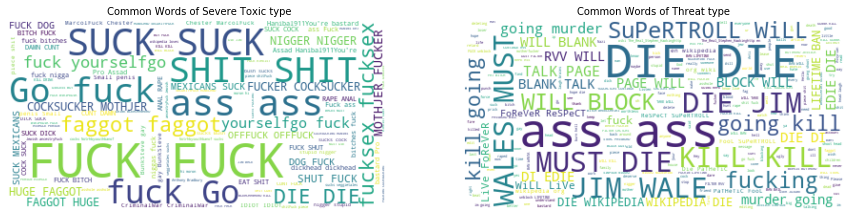

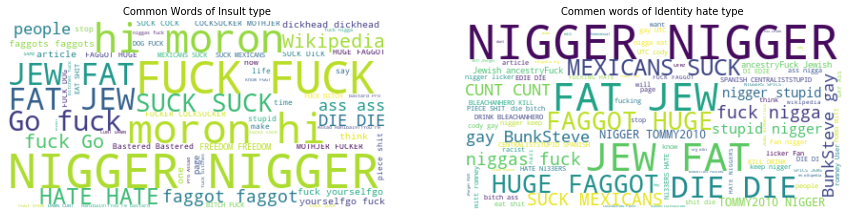

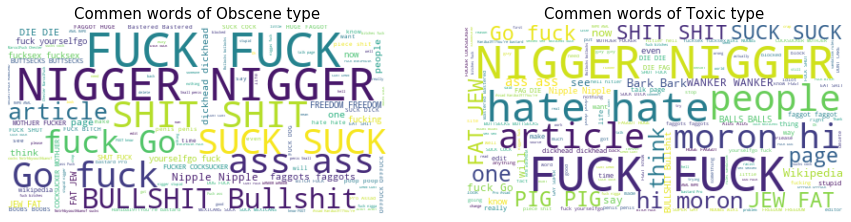

In [20]:

# building the word cloud
stopword=set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(severe_toxic_comment)

plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plt.title(" Common Words of Severe Toxic type", fontsize=10)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(threat_comment)
plt.subplot(2,2,2)
plt.title("Common Words of Threat type", fontsize=10)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")


plt.figure(figsize=(15, 15))

wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(insult_comment)
plt.subplot(2,2,3)
plt.title("Common Words of Insult type", fontsize=10)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear"
          )

wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(identity_hate_comment)
plt.subplot(2,2,4)
plt.title("Commen words of Identity hate type ", fontsize=10)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

stopword=set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(obscene_comment)

plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plt.title("Commen words of Obscene type", fontsize=15)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(toxic_comment)
plt.subplot(2,2,2)
plt.title("Commen words of Toxic type", fontsize=15)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

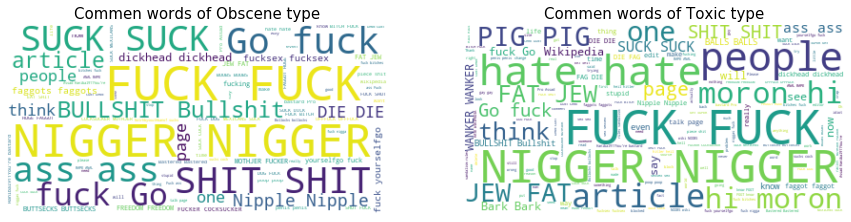

In [19]:
stopword=set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(obscene_comment)

plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plt.title("Commen words of Obscene type", fontsize=15)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white",stopwords=stopword).generate(toxic_comment)
plt.subplot(2,2,2)
plt.title("Commen words of Toxic type", fontsize=15)
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")

In [6]:
# calculate word count
toxic_data['word_count'] = toxic_data['comment_text'].apply(lambda x: len(str(x).split(" ")))

# remove stop words
stop = stopwords.words('english')
toxic_data['clean_comments'] = toxic_data['comment_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# to lowercase
toxic_data['clean_comments'] = toxic_data['clean_comments'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#remove punctuation
toxic_data['clean_comments'] = toxic_data['clean_comments'].str.replace('[^\w\s]','')
# lemmatize
toxic_data['clean_comments'] = toxic_data['clean_comments'].apply(lambda x: " ".join([Word(i).lemmatize() for i in x.split()]))

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(
    toxic_data['clean_comments'], toxic_data.iloc[:,2:8], test_size=0.3, random_state=1)

from sklearn.feature_extraction.text import TfidfVectorizer
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', stop_words='english',ngram_range=(2,3),max_features=5000,lowercase=False)
tfidf_vect.fit(toxic_data['comment_text'])
xtrain_tfidf =  tfidf_vect.fit_transform(xtrain)
xtest_tfidf =  tfidf_vect.transform(xtest)

# #characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char',stop_words='english', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(toxic_data['comment_text'])
xtrain_tfidf_chars =  tfidf_vect_ngram_chars.fit_transform(xtrain) 
xtest_tfidf_chars =  tfidf_vect_ngram_chars.transform(xtest)

D:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:520: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"
D:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [8]:
# stacking the features, wordlevl tf-idf and characters level tf-idf
from scipy import sparse
X = sparse.hstack([xtrain_tfidf, xtrain_tfidf_chars])
x_test = sparse.hstack([xtest_tfidf, xtest_tfidf_chars])

In [8]:
# creating matrix to store predcicted values
l, b = len(ytrain), 6;
Pred_Matrix = [[0 for x in range(l)] for y in range(b)]

In [9]:
ytest

,toxic,severe_toxic,obscene,threat,insult,identity_hate
24915,1,1,1,0,1,0
75819,0,0,0,0,0,0
53891,0,0,0,0,0,0
154159,0,0,0,0,0,0
13040,0,0,0,0,0,0
...,...,...,...,...,...,...
134673,0,0,0,0,0,0
21622,0,0,0,0,0,0
110716,0,0,0,0,0,0
127320,0,0,0,0,0,0


In [29]:
#-------Random Forest--------
# libaries for random forest and metrics
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100).fit(X, ytrain)
# Pred_Matrix[]= rf.predict(x_test)
# # converting the list to dataframe and transposing it
# pred = pd.DataFrame(data=Pred_Matrix)
# pred_val_rf =pred.T
# print('Accuracy of the Random Forest model : '+str(metrics.accuracy_score(ytest, pred_val_rf)))
# print('Classification Report for Random Forest : ')
# print(metrics.classification_report(ytest, pred_val_rf))

In [30]:
preds=rf.predict(x_test)

In [31]:
preds


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [32]:
pred=pd.DataFrame(data=preds)
pred

,0,1,2,3,4,5
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
47867,0,0,0,0,0,0
47868,0,0,0,0,0,0
47869,0,0,0,0,0,0
47870,0,0,0,0,0,0


In [33]:
print(accuracy_score(pred,ytest))

0.9099055815508021


In [34]:
print(metrics.classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.97      0.41      0.58      4695
           1       0.48      0.06      0.11       491
           2       0.95      0.52      0.67      2544
           3       0.50      0.03      0.05       154
           4       0.83      0.39      0.53      2387
           5       0.67      0.04      0.08       442

   micro avg       0.92      0.39      0.55     10713
   macro avg       0.73      0.24      0.33     10713
weighted avg       0.89      0.39      0.54     10713
 samples avg       0.04      0.03      0.03     10713



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [9]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(6, input_dim=10000))
model.add(Activation('sigmoid'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
y=ytrain.to_numpy()
yt=y_test.to_numpy()

NameError: name 'y_test' is not defined

In [ ]:
model.fit(X, y, epochs=1, batch_size=32)

In [ ]:
score = model.evaluate(x_test, yt, batch_size=128)